<a href="https://colab.research.google.com/github/bhavyamamidala/level-2/blob/main/Copy_of_cognifyz_LEVEL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LEVEL 2**

**Task 1:Table Booking and Online Delivery**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Determine the percentage of restaurants that
offer table booking and online delivery

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset.csv')
restaurants_with_table_booking = data[data['Has Table booking'] == 'Yes']
total_restaurants = len(data)
percentage_with_table_booking = (len(restaurants_with_table_booking) / total_restaurants) * 100
restaurants_with_online_delivery = data[data['Has Online delivery'] == 'Yes']
percentage_with_online_delivery = (len(restaurants_with_online_delivery) / total_restaurants) * 100
print(f"Percentage of restaurants with table booking: {percentage_with_table_booking:.2f}%")
print(f"Percentage of restaurants with online delivery: {percentage_with_online_delivery:.2f}%")


Percentage of restaurants with table booking: 12.12%
Percentage of restaurants with online delivery: 25.66%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Compare the average ratings of restaurants
with table booking and those without

In [ ]:
average_rating_with_table_booking = data[data['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_table_booking = data[data['Has Table booking'] == 'No']['Aggregate rating'].mean()
print(f"Average rating for restaurants with table booking: {average_rating_with_table_booking:.2f}")
print(f"Average rating for restaurants without table booking: {average_rating_without_table_booking:.2f}")


Average rating for restaurants with table booking: 3.44
Average rating for restaurants without table booking: 2.56


Analyze the availability of online delivery
among restaurants with different price ranges.

<Figure size 800x600 with 0 Axes>

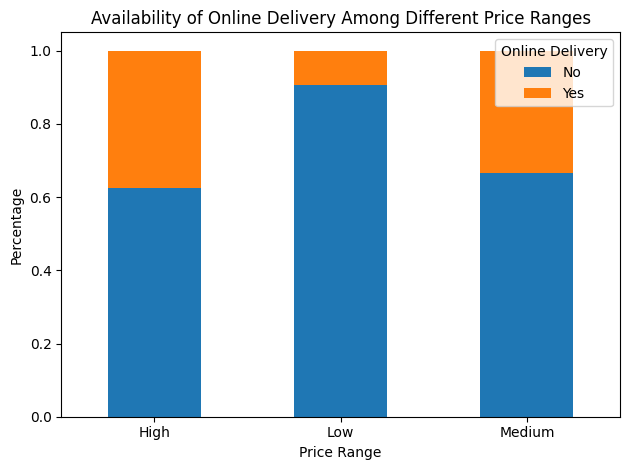

In [ ]:
price_ranges = ['Low', 'Medium', 'High']
def categorize_price(price):
    if price <= 300:
        return 'Low'
    elif price <= 600:
        return 'Medium'
    else:
        return 'High'

data['Price range'] = data['Average Cost for two'].apply(categorize_price)
online_delivery_counts = data.groupby('Price range')['Has Online delivery'].value_counts(normalize=True).unstack()
plt.figure(figsize=(8, 6))
online_delivery_counts.plot(kind='bar', stacked=True)
plt.title('Availability of Online Delivery Among Different Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Online Delivery')
plt.tight_layout()
plt.show()


**Task2: Price Range Analysis**

Determine the most common price range
among all the restaurants.

In [ ]:
price_ranges = {
    'Low': (0, 100),
    'Medium': (101, 600),
    'High': (601, float('inf'))
}
def categorize_price(price):
    for range_name, (min_value, max_value) in price_ranges.items():
        if min_value <= price <= max_value:
            return range_name

data['Price range'] = data['Average Cost for two'].apply(categorize_price)
most_common_price_range = data['Price range'].mode()[0]
print(f"The most common price range among all restaurants is: {most_common_price_range}")


The most common price range among all restaurants is: Medium


Calculate the average rating for each price
range

In [ ]:
price_ranges = {
    'Low': (0, 300),
    'Medium': (301, 600),
    'High': (601, float('inf'))
}
def categorize_price(price):
    for range_name, (min_value, max_value) in price_ranges.items():
        if min_value <= price <= max_value:
            return range_name
data['Price range'] = data['Average Cost for two'].apply(categorize_price)
average_ratings_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()
highest_avg_rating_color = average_ratings_by_price_range.idxmax()
print("Average Ratings by Price Range:")
print(average_ratings_by_price_range)
print(f"The color representing the highest average rating is: {highest_avg_rating_color}")

Average Ratings by Price Range:
Price range
High      3.410766
Low       2.228702
Medium    2.540929
Name: Aggregate rating, dtype: float64
The color representing the highest average rating is: High


Identify the color that represents the highest
average rating among different price ranges.


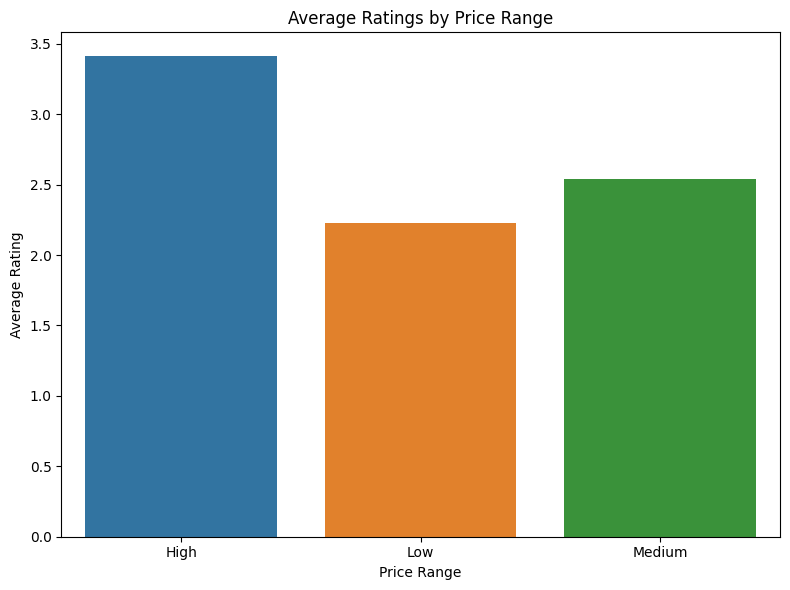

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=average_ratings_by_price_range.index, y=average_ratings_by_price_range.values)
plt.title('Average Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Task3: Feature Engineering**

Extract additional features from the existing
columns, such as the length of the restaurant
name or address

In [ ]:
data['Restaurant Name Length'] = data['Restaurant Name'].apply(len)
data['Address Length'] = data['Address'].apply(len)
print(data.head())



   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

Create new features like "Has Table Booking"
or "Has Online Delivery" by encoding
categorical variables.


In [ ]:
data['Has Table Booking'] = (data['Has Table booking'] == 'Yes').astype(int)
data['Has Online Delivery'] = (data['Has Online delivery'] == 'Yes').astype(int)
print(data.head())



   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 